In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [3]:
datos_finales = pd.read_csv("dataset_limpio.csv")
datos_finales

,UNNAMED: 0_X,AGE,GRUPO_EDAD,JOB,MARITAL,EDUCATION,DEFAULT,HOUSING,LOAN,CONTACT,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,EMP.VAR.RATE,CONS.PRICE.IDX,CONS.CONF.IDX,NR.EMPLOYED,Y,DATE,LATITUDE,LONGITUDE,ID,UNNAMED: 0_Y,INCOME,KIDHOME,TEENHOME,DT_CUSTOMER,NUMWEBVISITSMONTH,TOTAL_KIDS,CUSTOMER_SENIORITY
0,1,57.0,51-65,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,5191.0,no,2016-09-14,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,1,85477,1,1,2012-12-30,7,2,4018
1,2,37.0,36-50,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,5191.0,no,2019-02-15,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,2,147233,1,1,2012-02-02,5,2,4350
2,3,40.0,36-50,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,5191.0,no,2015-11-29,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,3,121393,1,2,2012-12-21,29,3,4027
3,4,56.0,51-65,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,5191.0,no,2017-01-29,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,4,63164,1,2,2012-06-20,20,3,4211
4,5,45.0,36-50,services,MARRIED,basic.9y,NaN,0.0,0.0,telephone,198,1,999,0,NONEXISTENT,1.1,93.994,-36.4,5191.0,no,2015-09-26,24.689,-101.643,d63ede72-0b6d-45b1-8872-385ac6897f65,5,143854,0,1,2012-01-24,26,1,4359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37434,28721,36.0,36-50,blue-collar,MARRIED,UNKNOWN,0.0,1.0,1.0,cellular,90,1,999,1,FAILURE,-1.8,93.075,-47.1,5099.1,no,2016-08-05,49.310,-93.780,649cf395-b67a-416c-b9ae-3eaf6d3661c5,14077,129333,0,2,2014-04-10,15,2,3552
37435,37852,26.0,26-35,student,SINGLE,high.school,0.0,0.0,0.0,cellular,133,1,999,0,NONEXISTENT,-2.9,92.201,-31.4,5076.2,no,2016-06-01,29.871,-86.270,12d4e85c-39d9-4193-a27d-a58e7af15a43,14078,169378,1,2,2014-12-31,30,3,3287
37436,1120,34.0,26-35,blue-collar,SINGLE,basic.9y,0.0,0.0,0.0,telephone,159,3,999,0,NONEXISTENT,1.1,93.994,-36.4,5191.0,no,2018-04-04,36.430,-95.459,0490dbb9-e21d-4b59-a402-93756e8f17da,14080,159144,1,0,2014-10-14,1,1,3365
37437,3797,30.0,26-35,admin.,MARRIED,university.degree,0.0,1.0,0.0,telephone,355,2,999,0,NONEXISTENT,1.1,93.994,-36.4,5191.0,no,2018-04-10,36.468,-74.361,d9f2c31c-7623-44df-9240-b4514bf21abd,14081,51496,0,0,2014-09-18,12,0,3391


<Figure size 640x480 with 0 Axes>

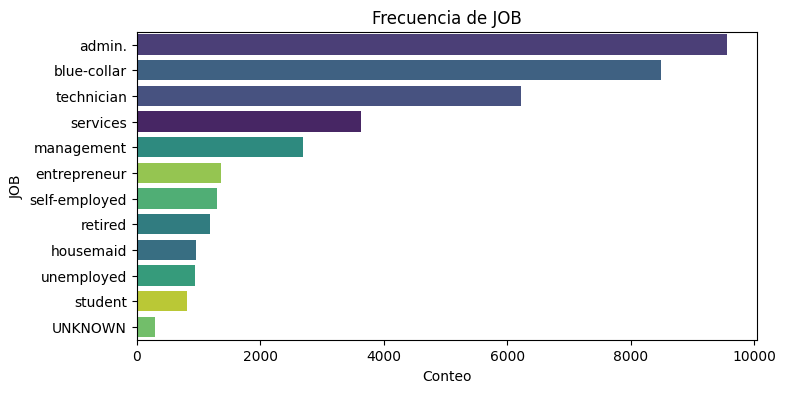

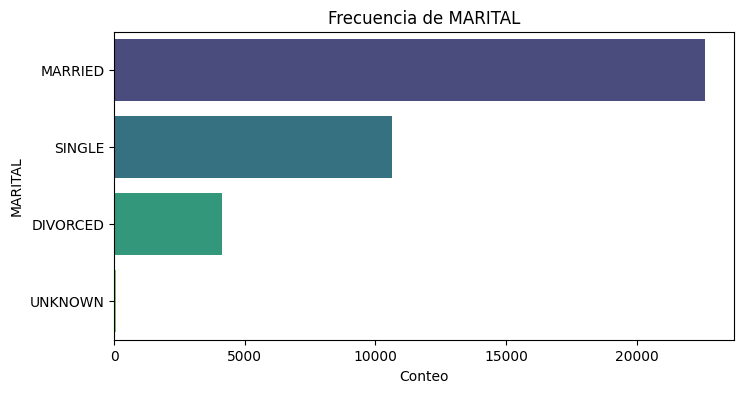

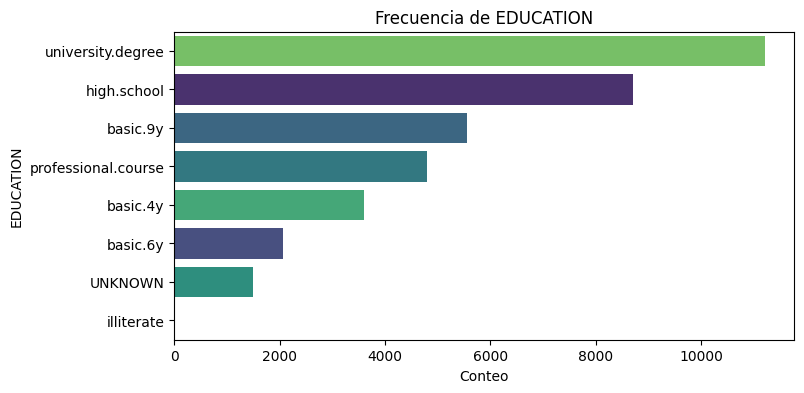

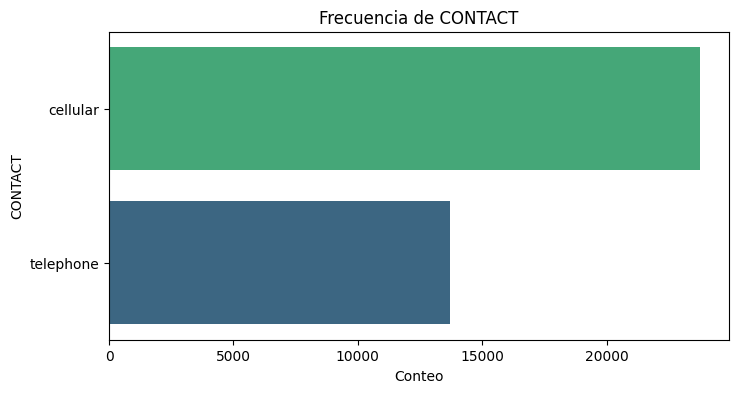

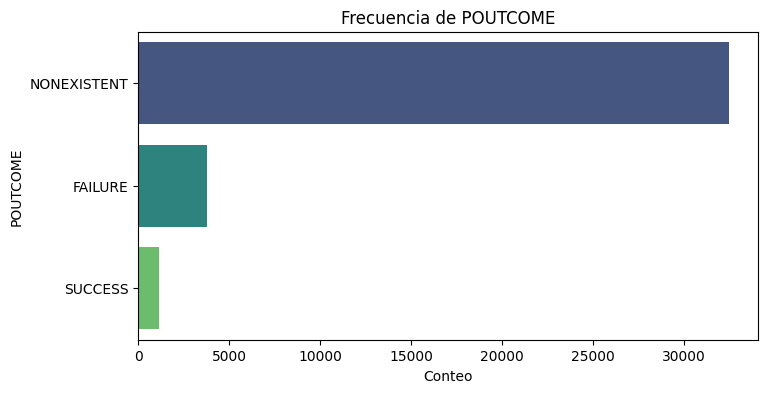

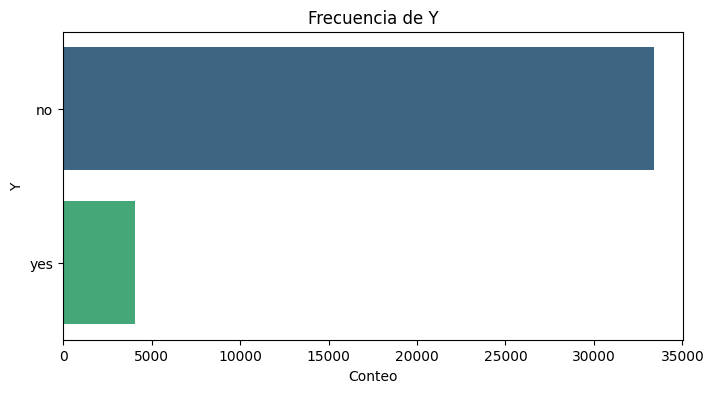

In [4]:
# Columnas categóricas (excluyendo IDs y columnas únicas como fechas o identificadores)
columnas_categoricas = ['JOB', 'MARITAL', 'EDUCATION', 'CONTACT', 'POUTCOME', 'Y']

plt.subplots_adjust(hspace=0.5, wspace=0.5)
# Gráficos de distribución categórica
for col in columnas_categoricas:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=datos_finales[col], order=datos_finales[col].value_counts().index, hue = datos_finales[col], palette='viridis', legend = False)
    plt.title(f'Frecuencia de {col}')
    plt.xlabel('Conteo')
    plt.ylabel(col)
    plt.show()

In [5]:
tabla_groupby = datos_finales.groupby('GRUPO_EDAD')['Y'].value_counts().unstack()

# Calcular los porcentajes de cada valor de 'y' dentro de cada grupo de edad
tabla_porcentual_groupby = datos_finales.groupby('GRUPO_EDAD')['Y'].value_counts(normalize=True).unstack() * 100

# Crear gráfico del porcentaje de 'yes', 'no' por grupo de edad
porcentajes = tabla_porcentual_groupby.reset_index().melt(id_vars='GRUPO_EDAD', value_vars=['yes', 'no'],var_name='Respuesta', value_name='Porcentaje')

In [6]:
print("\n Cantidad de contratación por grupo:")
print(tabla_groupby)
print("\n Porcentaje de contratación por grupo:")
print(tabla_porcentual_groupby.round(2))


 Cantidad de contratación por grupo:
Y              no   yes
GRUPO_EDAD             
18-25        1231   324
26-35       12114  1591
36-50       14696  1359
51-65        5259   725
66+            73    62

 Porcentaje de contratación por grupo:
Y              no    yes
GRUPO_EDAD              
18-25       79.16  20.84
26-35       88.39  11.61
36-50       91.54   8.46
51-65       87.88  12.12
66+         54.07  45.93


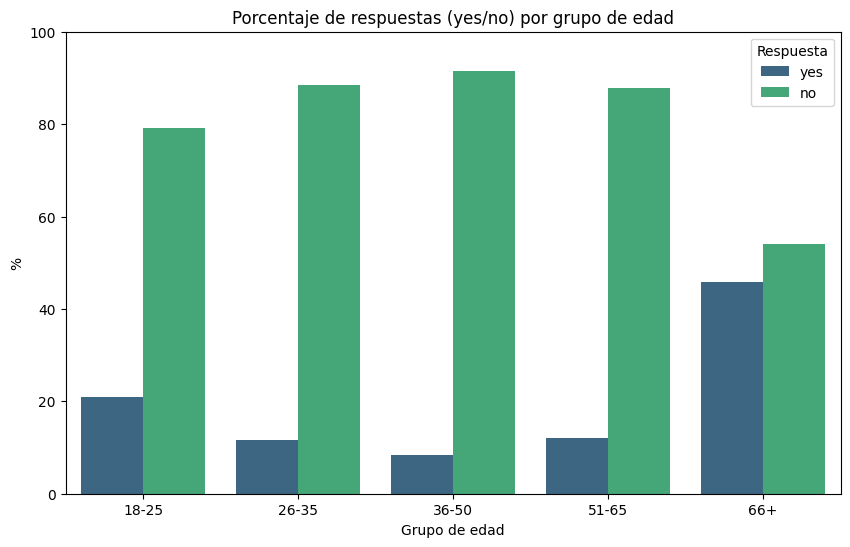

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(data=porcentajes, x='GRUPO_EDAD', y='Porcentaje', hue='Respuesta', palette='viridis')
plt.title('Porcentaje de respuestas (yes/no) por grupo de edad')
plt.ylabel('%')
plt.xlabel('Grupo de edad')
plt.ylim(0, 100)
plt.legend(title='Respuesta')
plt.show()

In [8]:
variables_categoricas = columnas_categoricas[:-1]  # Excluyendo 'Y' para el análisis de conteos y porcentajes

# Diccionarios para guardar los resultados
conteos_categoricos = {}
porcentajes_categoricos = {}

# Calcular conteos y porcentajes
for var in variables_categoricas:
    conteos = datos_finales.groupby(var)['Y'].value_counts().unstack().fillna(0).astype(int)
    porcentajes = datos_finales.groupby(var)['Y'].value_counts(normalize=True).unstack() * 100
    conteos_categoricos[var] = conteos
    porcentajes_categoricos[var] = porcentajes.round(2)

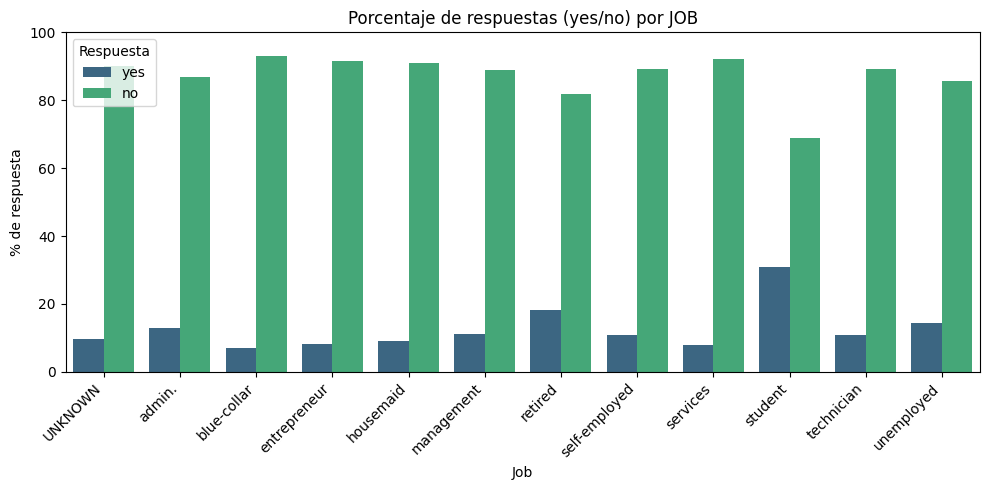

Y                 no    yes
JOB                        
UNKNOWN        90.20   9.80
admin.         86.98  13.02
blue-collar    93.09   6.91
entrepreneur   91.67   8.33
housemaid      90.99   9.01
management     88.92  11.08
retired        81.86  18.14
self-employed  89.12  10.88
services       92.14   7.86
student        68.98  31.02
technician     89.10  10.90
unemployed     85.71  14.29


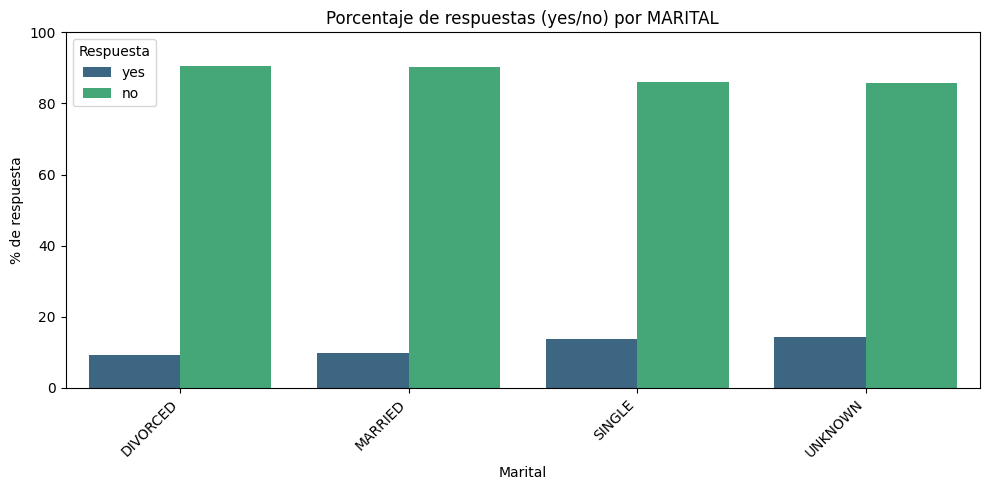

Y            no    yes
MARITAL               
DIVORCED  90.65   9.35
MARRIED   90.31   9.69
SINGLE    86.12  13.88
UNKNOWN   85.71  14.29


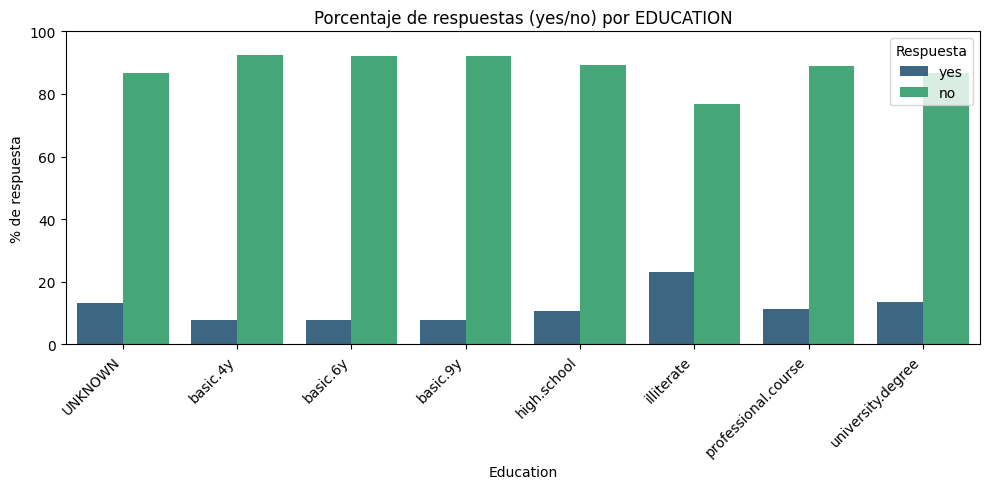

Y                       no    yes
EDUCATION                        
UNKNOWN              86.75  13.25
basic.4y             92.32   7.68
basic.6y             92.04   7.96
basic.9y             92.04   7.96
high.school          89.28  10.72
illiterate           76.92  23.08
professional.course  88.80  11.20
university.degree    86.54  13.46


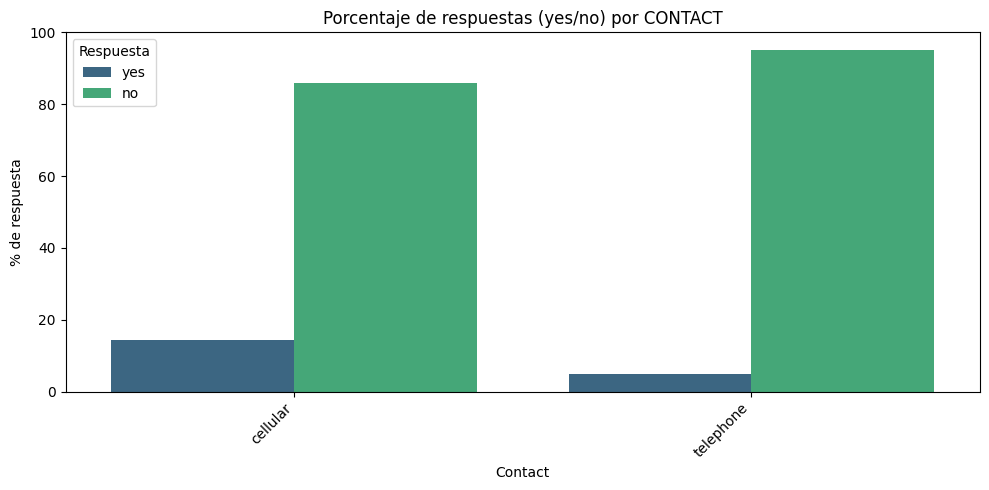

Y             no    yes
CONTACT                
cellular   85.77  14.23
telephone  95.00   5.00


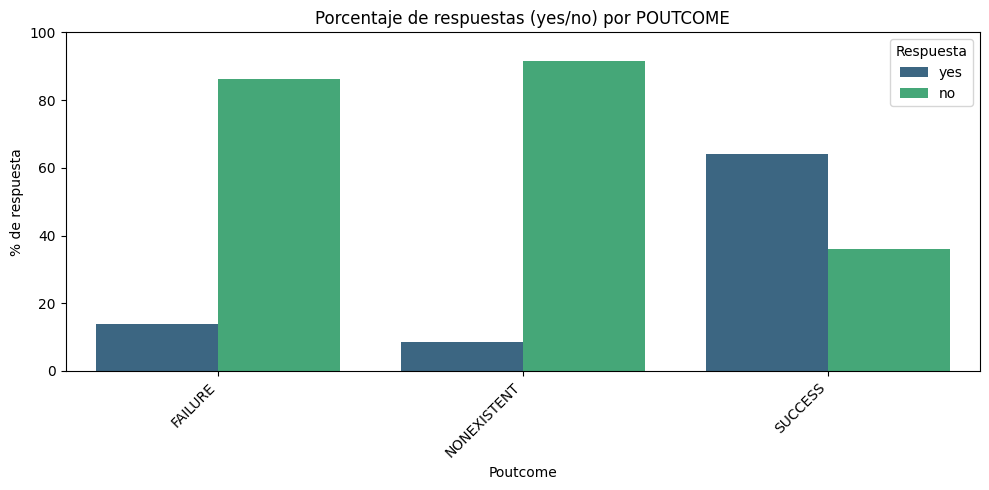

Y               no    yes
POUTCOME                 
FAILURE      86.22  13.78
NONEXISTENT  91.43   8.57
SUCCESS      35.96  64.04


In [9]:
for var in variables_categoricas:
    # Preparar los datos en formato largo (melt)
    df_plot = porcentajes_categoricos[var].reset_index().melt(id_vars=var,  value_vars=['yes', 'no'], var_name='Respuesta', value_name='Porcentaje')
    
    # Crear gráfico
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_plot, x=var, y='Porcentaje', hue='Respuesta', palette='viridis')
    plt.title(f'Porcentaje de respuestas (yes/no) por {var}')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('% de respuesta')
    plt.xlabel(var.capitalize())
    plt.ylim(0, 100)
    plt.legend(title='Respuesta')
    plt.tight_layout()
    plt.show()
    
    print(porcentajes_categoricos[var].round(2))

In [10]:
def extraer_top_perfiles(df, top_n=5):
    variables_perfil = ['GRUPO_EDAD', 'JOB', 'MARITAL', 'EDUCATION', 'CONTACT', 'POUTCOME']

    df_yes = df[df['Y'] == 'yes']
    total_yes = df_yes.shape[0]
    perfiles_yes = df_yes.groupby(variables_perfil).size().sort_values(ascending=False)
    top_yes = perfiles_yes.head(top_n)
    top_yes_set = set(top_yes.index)

    # Mostrar perfil más común con YES
    perfil_top_yes = top_yes.index[0]
    print("\n Perfil más común con Y = 'yes':")
    for label, valor in zip(variables_perfil, perfil_top_yes):
        print(f"- {label}: {valor}")
    print(f"Frecuencia: {top_yes.values[0]} ({(top_yes.values[0]/total_yes)*100:.2f}%)")

    # Mostrar top 5 con YES
    top_yes_df = top_yes.reset_index()
    top_yes_df.columns = variables_perfil + ['Frecuencia']
    top_yes_df['% sobre total'] = (top_yes_df['Frecuencia'] / total_yes * 100).round(2)

    print(f"\n Top {top_n} perfiles con Y = 'yes':\n")
    print(top_yes_df.to_string(index=False))

    df_no = df[df['Y'] == 'no']
    total_no = df_no.shape[0]
    perfiles_no = df_no.groupby(variables_perfil).size().sort_values(ascending=False)
    perfiles_no_filtrados = perfiles_no[~perfiles_no.index.isin(top_yes_set)]
    top_no = perfiles_no_filtrados.head(top_n)

    # Mostrar perfil más común con NO
    perfil_top_no = top_no.index[0]
    print("\n Perfil más común con Y = 'no':")
    for label, valor in zip(variables_perfil, perfil_top_no):
        print(f"- {label}: {valor}")
    print(f"Frecuencia: {top_no.values[0]} ({(top_no.values[0]/total_no)*100:.2f}%)")

    # Mostrar top 5 con NO
    top_no_df = top_no.reset_index()
    top_no_df.columns = variables_perfil + ['Frecuencia']
    top_no_df['% sobre total'] = (top_no_df['Frecuencia'] / total_no * 100).round(2)

    print(f"\n Top {top_n} perfiles con Y = 'no':\n")
    print(top_no_df.to_string(index=False))

    return top_yes_df, top_no_df

# Se deciden extraer los perfiles mas comunes en el caso de 'yes' y 'no' sin que se puedan repetir en 'no' algun perfil que haya salido en 'yes' para evitar incrongruencias

In [11]:
top_yes, top_no_exclusivo = extraer_top_perfiles(datos_finales, top_n=5)


 Perfil más común con Y = 'yes':
- GRUPO_EDAD: 26-35
- JOB: admin.
- MARITAL: SINGLE
- EDUCATION: university.degree
- CONTACT: cellular
- POUTCOME: NONEXISTENT
Frecuencia: 145 (3.57%)

 Top 5 perfiles con Y = 'yes':

GRUPO_EDAD    JOB MARITAL         EDUCATION  CONTACT    POUTCOME  Frecuencia  % sobre total
     26-35 admin.  SINGLE university.degree cellular NONEXISTENT         145           3.57
     36-50 admin. MARRIED university.degree cellular NONEXISTENT          85           2.09
     26-35 admin. MARRIED university.degree cellular NONEXISTENT          79           1.94
     26-35 admin.  SINGLE       high.school cellular NONEXISTENT          59           1.45
     26-35 admin.  SINGLE university.degree cellular     SUCCESS          51           1.26

 Perfil más común con Y = 'no':
- GRUPO_EDAD: 36-50
- JOB: blue-collar
- MARITAL: MARRIED
- EDUCATION: basic.4y
- CONTACT: telephone
- POUTCOME: NONEXISTENT
Frecuencia: 493 (1.48%)

 Top 5 perfiles con Y = 'no':

GRUPO_EDAD      